# CMR - Single List Length
Now that relevant dependencies are specified and testing, we'll jump right into fitting the model to larger portions of the dataset. This time, we'll do the entire 20-item list length subset of the Murdock (1962) dataset.

## Load Data

In [6]:
from instance_cmr.datasets import prepare_murddata
from instance_cmr.model_fitting import cmr_murd_likelihood
from instance_cmr.model_fitting import cmr_murd_objective_function
from instance_cmr.model_fitting import visualize_fit
from instance_cmr.models import CMR

murd_trials0, murd_events0, murd_length0 = prepare_murddata(
    '../../../data/MurdData_clean.mat', 0)

murd_events0.head()

,subject,list,item,input,output,study,recall,repeat,intrusion
0,1,1,1,1,5.0,True,True,0,False
1,1,1,2,2,7.0,True,True,0,False
2,1,1,3,3,NaN,True,False,0,False
3,1,1,4,4,NaN,True,False,0,False
4,1,1,5,5,NaN,True,False,0,False


## Fitting

In [ ]:
from scipy.optimize import differential_evolution
from numba.typed import List
import numpy as np

free_parameters = [
    'encoding_drift_rate',
    'start_drift_rate',
    'recall_drift_rate',
    'shared_support',
    'item_support',
    'learning_rate',
    'primacy_scale',
    'primacy_decay',
    'stop_probability_scale',
    'stop_probability_growth',
    'choice_sensitivity']

lb = np.finfo(float).eps
ub = 1-np.finfo(float).eps

bounds = [
    (lb, ub),
    (lb, ub),
    (lb, ub),
    (lb, ub),
    (lb, ub),
    (lb, ub),
    (lb, 100),
    (lb, 100),
    (lb, ub),
    (lb, 10),
    (lb, 10)
]

# cost function to be minimized
# ours scales inversely with the probability that the data could have been 
# generated using the specified parameters and our model
cost_function = cmr_murd_objective_function(
    List([murd_trials0]), 
    {'item_counts': List([murd_length0])}, free_parameters)

result = differential_evolution(cost_function, bounds, disp=True)
print(result)

## Results
```
     fun: 21239.596136083273
 message: 'Optimization terminated successfully.'
    nfev: 9606
     nit: 57
 success: True
       x: array([ 0.54926441,  0.12884982,  0.74057096,  0.26469486,  0.18835232,
        0.18321188,  2.88148434, 30.13008952,  0.04958878,  0.21112143,
        5.58388858])
```

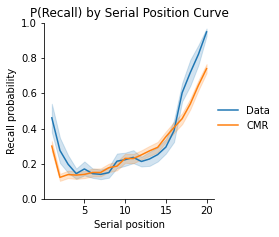

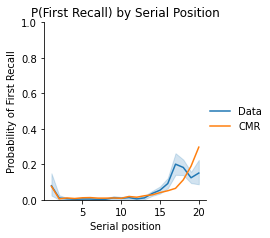

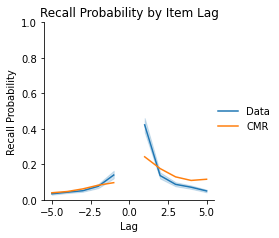

In [7]:
parameters = {
    'item_count':murd_length0,
    'presentation_count': murd_length0
}

visualize_fit(CMR, 
              {**parameters, 
               **{free_parameters[i]:result.x[i] for i in range(len(result.x))}}, 
              murd_events0, 'subject > -1', experiment_count=1000, savefig=True)